In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def n1(h, t, x, y, z, e, f, g):
    return e( t, x, y, z )
def n2(h, t, x, y, z, e, f, g):
    return e( t + 0.5*h, x + 0.5*h*n1(h, t, x, y, z, e, f, g), y + 0.5*h*o1(h, t, x, y, z, e, f, g), z + 0.5*h*p1(h, t, x, y, z, e, f, g) )
def n3(h, t, x, y, z, e, f, g):
    return e( t + 0.5*h, x + 0.5*h*n2(h, t, x, y, z, e, f, g), y + 0.5*h*o2(h, t, x, y, z, e, f, g), z + 0.5*h*p2(h, t, x, y, z, e, f, g) )
def n4(h, t, x, y, z, e, f, g):
    return e( t + h, x + h*n3(h, t, x, y, z, e, f, g), y + h*o3(h, t, x, y, z, e, f, g), z+ h*p3(h, t, x, y, z, e, f, g) )

def o1(h, t, x, y, z, e, f, g):
    return f( t, x, y, z )
def o2(h, t, x, y, z, e, f, g):
    return f( t + 0.5*h, x + 0.5*h*n1(h, t, x, y, z, e, f, g), y + 0.5*h*o1(h, t, x, y, z, e, f, g), z + 0.5*h*p1(h, t, x, y, z, e, f, g) )
def o3(h, t, x, y, z, e, f, g):
    return f( t + 0.5*h, x + 0.5*h*n2(h, t, x, y, z, e, f, g), y + 0.5*h*o2(h, t, x, y, z, e, f, g), z + 0.5*h*p2(h, t, x, y, z, e, f, g) )
def o4(h, t, x, y, z, e, f, g):
    return f( t + h, x + h*n3(h, t, x, y, z, e, f, g), y + h*o3(h, t, x, y, z, e, f, g), z+ h*p3(h, t, x, y, z, e, f, g) )

def p1(h, t, x, y, z, e, f, g):
    return g( t, x, y, z )
def p2(h, t, x, y, z, e, f, g):
    return g( t + 0.5*h, x + 0.5*h*n1(h, t, x, y, z, e, f, g), y + 0.5*h*o1(h, t, x, y, z, e, f, g), z + 0.5*h*p1(h, t, x, y, z, e, f, g) )
def p3(h, t, x, y, z, e, f, g):
    return g( t + 0.5*h, x + 0.5*h*n2(h, t, x, y, z, e, f, g), y + 0.5*h*o2(h, t, x, y, z, e, f, g), z + 0.5*h*p2(h, t, x, y, z, e, f, g) )
def p4(h, t, x, y, z, e, f, g):
    return g( t + h, x + h*n3(h, t, x, y, z, e, f, g), y + h*o3(h, t, x, y, z, e, f, g), z+ h*p3(h, t, x, y, z, e, f, g) )

def evolve3(h, t, x, y, z, e, f, g):
    x1 = x+h/6*(n1(h,t,x,y,z,e,f,g)+2*n2(h,t,x,y,z,e,f,g)+2*n3(h,t,x,y,z,e,f,g)+n4(h,t,x,y,z,e,f,g))
    y1 = y+h/6*(o1(h,t,x,y,z,e,f,g)+2*o2(h,t,x,y,z,e,f,g)+2*o3(h,t,x,y,z,e,f,g)+o4(h,t,x,y,z,e,f,g))
    z1 = z+h/6*(p1(h,t,x,y,z,e,f,g)+2*p2(h,t,x,y,z,e,f,g)+2*p3(h,t,x,y,z,e,f,g)+p4(h,t,x,y,z,e,f,g))
    t1 = t+h
    return t1, x1, y1, z1

Text(0,0.5,'$\\mathrm{z}$')

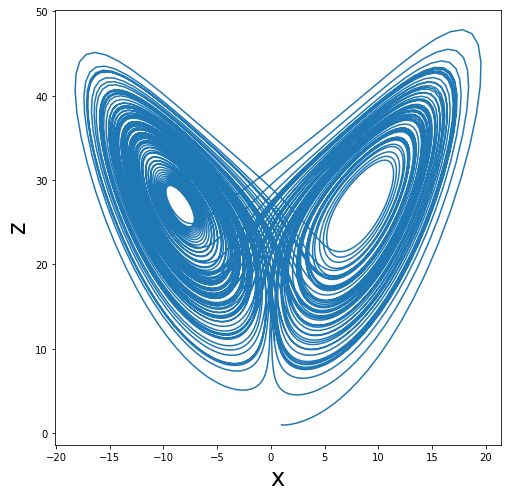

In [3]:
def e(t, x, y, z, sigma = 10):
    return sigma*(y-x)
def f(t, x, y, z, rho = 28):
    return x*(rho-z) - y
def g(t, x, y, z, beta = 8/3):
    return x*y-beta*z

steps = 10000
tarr = np.zeros(steps)
xarr = np.zeros(steps)
yarr = np.zeros(steps)
zarr = np.zeros(steps)
xarr[0] = 1
yarr[0] = 1
zarr[0] = 1

for i in range(1, steps):
    ev = evolve3(0.01, tarr[i-1], xarr[i-1], yarr[i-1], zarr[i-1], e, f, g )
    #print ev
    tarr[i] = ev[0]
    xarr[i] = ev[1]
    yarr[i] = ev[2]
    zarr[i] = ev[3]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.plot(xarr, zarr)
ax.set_xlabel(r'$\mathrm{x}$', fontsize = 24)
ax.set_ylabel(r'$\mathrm{z}$', fontsize = 24)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

N_points = np.size(xarr)
#print(N_points)
fig = plt.figure(figsize = (8, 8))
ax = fig.gca(projection='3d')

# colors need to be 3-tuples with values between 0-1.
# if you want to use the time values directly, you could do something like
for i in range(1, N_points):
    ax.plot(xarr[i-1:i+1], yarr[i-1:i+1], zarr[i-1:i+1], c=(0, tarr[i-1]/np.max(tarr), 1-tarr[i-1]/np.max(tarr)), linewidth = 0.5)
    #print(i)
plt.axis('off')
start = 1577
clip = 0.68
#plt.subplots_adjust(left=0.5-clip, right=0.5+clip, top=0.5+clip, bottom=0.5-clip)
line1=ax.scatter(xarr[start], yarr[start], zarr[start], color = 'r', marker = 'o', s = 10)
#plt.savefig('/media/tlee/Data/rk4/scatter_try.png', dpi = 1000)
#plt.show()
for j in range(0,630+360):
    ax.view_init(j*360/(630+360)-90, j*360/(630+360))
    line1.remove()
    line1 = ax.scatter(xarr[start+j], yarr[start+j], zarr[start+j], color = 'r', marker = 'o', s = 10)
    plt.subplots_adjust(left=0.5-clip, right=0.5+clip, top=0.5+clip, bottom=0.5-clip)
    plt.savefig('/home/tlee/Documents/jupyter/fun/lorenz_bead/{:04d}.png'.format(j), dpi = 100)
